# Charged particles

### Task 1
**A.** Plot the relativistic unscreened Rutherford differential cross section 

$\frac{d \sigma}{d \Omega} = r_e^2 (z Z)^2 \left( \frac{m_e c^2}{m_0 c^2} \right)^2 \frac{1 - \beta^2}{\beta^2} \frac{1}{(1 - \cos \theta)^2}$

as a function of the scattering angle $\theta$ for electrons with the velocity $\beta = 0.9$ in carbon ($Z = 6$).

**B.** Plot the screened version

$\frac{d \sigma}{d \Omega} = (z Z r_e)^2 \left( \frac{m_e c^2}{m_0 c^2} \right)^2 \frac{1 - \beta^2}{\beta^2} \frac{1}{(1 - \cos \theta + 0.5 \chi_a^2)^2}$

where the screening angle $\chi_a$ taken from the Moliere's multiple scattering theory (using quantum mechanical perturbation methods) is given as

$\chi_a^2 = \chi_0^2 \left[ 1.13 + 3.76 \left( \frac{zZ}{137 \beta} \right)^2 \right]$.

The screening angle $\chi_0$ is defined as

$\chi_0 = \frac{4.2121 \times 10^{-3} \sqrt{1 - \beta^2}}{m_0 c^2 \beta} Z^{1/3}$.

**C.** Plot a simplified version of the Mott DCS by McKinley and Feshbach

$\frac{d \sigma_M}{d \Omega} = \frac{d \sigma_R}{d \Omega} \left[ 1 - \beta^2 \sin^2 \frac{\theta}{2} + \pi \alpha \beta Z \sin \frac{\theta}{2} \left( 1 - \sin \frac{\theta}{2} \right) \right]$

which approximates the Mott DCS for $Z < 40$ and $\beta \approx 1$ with accuracy of about 1%.

Chi_0 = 0.002709 rad
Chi_a = 0.002890 rad


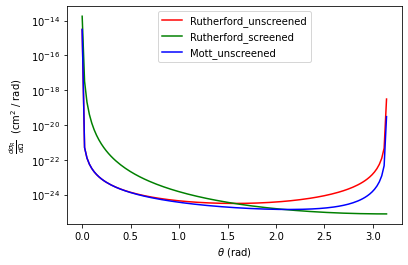

In [6]:
import math
import numpy as np
from matplotlib import pyplot as plt


def dcs_R(theta, beta, z, m0c2, Z):
  # Relativistic unscreened Rutherford differential cross section
  #
  # theta  scattering angle in rad
  # beta   velocity of the particle relative to the speed of light c
  # z      charge of the particle in e
  # m0c2   rest energy of the particle
  # Z      atomic number of the medium
  
  r_e = 2.818e-13  # Classical electron radius in cm
  mec2 = 0.511     # Rest energy of electron in MeV
  return( (r_e * z * Z)**2 *(mec2 / m0c2)**2 * (1 - beta**2) / beta**2 * 1 / (1 - math.cos(theta)**2))


def dcs_R_screened(theta, beta, z, m0c2, Z):
  # Relativistic screened Rutherford differential cross section
  #
  # theta  scattering angle
  # beta   velocity of the particle relative to the speed of light c
  # z      charge of the particle in e
  # m0c2   rest energy of the particle
  # Z      atomic number of the medium
  
  r_e = 2.818e-13  # Classical electron radius in cm
  mec2 = 0.511     # Rest energy of electron in MeV
  return( (r_e * z * Z)**2 *(mec2 / m0c2)**2 * (1 - beta**2) / beta**2 * 1 / (1 - math.cos(theta) + 0.5 * chi_a**2)**2)


def dcs_M(theta, beta, z, m0c2, Z):
  # Relativistic unscreened Mott differential cross section
  #
  # theta  scattering angle
  # beta   velocity of the particle relative to the speed of light c
  # z      charge of the particle in e
  # m0c2   rest energy of the particle in MeV
  # Z      atomic number of the medium

  alpha = 0.0072973525693  # Fine structure constant (approx. 1/137)
  dcs_R_u = dcs_R(theta, beta, z, m0c2, Z)
  return( dcs_R_u * (1 - beta**2 * (math.sin(theta/2))**2 + math.pi * alpha * beta * Z * math.sin(theta/2) * (1 - math.sin(theta/2) ) ))


# Define the incident particle
beta = 0.95   # velocity relative to c
z = 1         # electron
m0c2 = 0.511  # rest energy in MeV

# Define the material
Z = 6        # carbon

# Calculate and print screening angles chi_0 and chi_a
mec2 = 0.511  # Rest energy of electron in MeV
chi_0 = 4.2121e-3 * math.sqrt(1 - beta**2) / (mec2 * beta) * z**(1/3)
chi_a = chi_0 * math.sqrt(1.13 + 3.76 * ( (z * Z) / (137 * beta) )**2)
print('Chi_0 = {:f} rad'.format(chi_0))
print('Chi_a = {:f} rad'.format(chi_a))

# Compute plot points
nPoints = 128
theta_a = np.linspace(1e-5, (math.pi - 0.001), nPoints)
dcs_R_u_a = np.empty(nPoints)
dcs_R_s_a = np.empty(nPoints)
dcs_M_u_a = np.empty(nPoints)
for i in range(nPoints):
     dcs_R_u_a[i] = dcs_R(theta_a[i], beta, z, m0c2, Z)
     dcs_R_s_a[i] = dcs_R_screened(theta_a[i], beta, z, m0c2, Z)
     dcs_M_u_a[i] = dcs_M(theta_a[i], beta, z, m0c2, Z)
     

# Plot the figure
plt.plot(theta_a, dcs_R_u_a, 'r', label = 'Rutherford_unscreened')
plt.plot(theta_a, dcs_R_s_a, 'g', label = 'Rutherford_screened')
plt.plot(theta_a, dcs_M_u_a, 'b', label = 'Mott_unscreened')
plt.semilogy()
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\frac{d \sigma_R}{d \Omega}$  (cm$^2$ / rad)')
plt.legend(loc = 'upper center',)
plt.show()

### Task 2
Calculate the mass electronic stopping power for electrons and positrons with kinetic energy of 50 MeV in aluminium with and without the density effect correction.

The mass electronic stopping power for electrons and positrons with kinetic energy relative to their rest energy, $\tau$, is given by (neglecting the shell correction)

$\frac{1}{\rho} S^{\pm}_\mathrm{el} = 2 \pi r_e^2 m_e c^2 N_A \frac{Z}{A} \frac{1}{\beta^2} [ \ln(E/I)^2 + \ln(1 + \tau/2) + F^{\pm}(\tau) - \delta(\beta)]$

with

$F^{-}(\tau) = (1 - \beta^2) \left[ 1 + \frac{\tau^2}{8} - (2\tau + 1) \ln 2) \right]$

$F^{+}(\tau) = 2\ln 2 - \frac{\beta^2}{12} \left[ 23 + \frac{14}{\tau + 2} + \frac{10}{(\tau + 2)^2} + \frac{4}{(\tau + 2)^3}\right]$

for electrons and positrons, respectively.

For the aluminium target, $Z=13$, $A=26.98$, $\rho =2.6989$ g cm$^{-3}$, $I_{Al} = 166$ eV, and the Sternheimer density effect parameters are $C = -4.2395$, $X_0 = 0.1708$, $X_1 = 3.0127$, $a = 0.008024$, $m = 3.6345$, and $\delta(X_0) = 0.12$.

The Sternheimer parameter $X$ for the density effect correction is defined as

$X = 0.5 \lg[\tau (\tau + 2)]$.

The Sternheimer model for the density effect is

$\delta(X) = 4.6052 X + a(X_1 - X)^m + C  \quad (X_0 < X < X_1)$

$\delta(X) = 4.6052 X + C. \quad (X > X_1)$.

In [7]:
import math


def mSel_e(beta, Z, A, I, delta):
    # Mass electronic stopping power for electrons
    #
    # beta   velocity of the electron relative to c
    # Z      atomic number
    # A      mass number
    # I      mean exitation potential in eV
    # delta  density effect correction
    
    c1 = 0.153537  # MeV cm^2
    mec2 = 0.511  # Electron rest energy in MeV
    tau = 1 / math.sqrt(1 - beta**2) - 1
    E = tau * mec2
    return(c1 * Z / A * 1 / beta**2 * (math.log((E/(1e-6 * I))**2) + math.log(1 + tau / 2) + F_el(tau) - delta)) 


def mSel_p(beta, Z, A, I, delta):
    # Mass electronic stopping power for positrons
    # beta   velocity of the electron relative to c
    # Z      atomic number
    # A      mass number
    # I      mean exitation potential in eV
    # delta  density effect correction
    
    c1 = 0.153537  # MeV cm^2
    mec2 = 0.511  # Electron rest energy in MeV
    tau = 1 / math.sqrt(1 - beta**2) - 1
    E = tau * mec2
    return(c1 * Z / A * 1 / beta**2 * (math.log((E / (1e-6 * I))**2) + math.log(1 + tau / 2) + F_po(tau) - delta)) 


def F_el(tau):
    # The F-function for stopping power of electrons
    #
    # tau  kinetic energy relative to rest energy
    
    beta = math.sqrt(1 - 1 / (tau + 1)**2)
    return((1 - beta**2) * (1 + tau**2 / 8 - (2 * tau + 1) * math.log(2)))


def F_po(tau):
    # The F-function for stopping power of positrons
    #
    # tau  kinetic energy relative to rest energy
    
    beta = math.sqrt(1 - 1 / (tau + 1)**2)
    return(2 * math.log(2) - beta**2 / 12 * (23 + 14 / (tau + 2) + 10 / (tau + 2)**2 + 4 / (tau + 2)**3))


def delta(beta):
    # The density effect correction using Sternhaimer's model
    #
    # beta   velocity of the particle relative to c
    
    # The following numbers are specific for Al
    a = 0.08024
    X0 = 0.1708
    X1 = 3.0127
    C = -4.2395
    m = 3.6345
    
    tau = 1 / math.sqrt(1 - beta**2) - 1
    X = 0.5 * math.log10(tau * (tau + 2))
    if X > X1:
        return(4.6052 * X + C)
    if X > X0:
        return(4.6052 * X + a * (X1 - X)**m + C)
    return(0.0)


# Define the incident particle    
E = 50.0  # kinetic energy of the particle in MeV

# Define the material
Z = 13     # Atomic number
A = 26.98  # Mass number
I = 166    # Mean excitation energy in eV

# Compute beta corresponding to the kinetic energy E
mec2 = 0.511   # Electron rest energy in MeV
tau = 50.0 / mec2 
beta = math.sqrt(1 - 1 / (tau + 1)**2)

# Compute electronic stopping powers
mSel_electron_nodelta = mSel_e(beta, Z, A, I, 0.0)
mSel_positron_nodelta = mSel_p(beta, Z, A, I, 0.0)

deltaX = delta(beta) 
mSel_electron = mSel_e(beta, Z, A, I, deltaX)
mSel_positron = mSel_p(beta, Z, A, I, deltaX)

# Print the results
print('mass electronic stopping power for electron (no density effect correction) = {:g} MeV cm^2 g^-1'.format(mSel_electron_nodelta))
print('mass electronic stopping power for positron (no density effect correction) = {:g} MeV cm^2 g^-1'.format(mSel_positron_nodelta))

print('mass electronic stopping power for electron = {:g} MeV cm^2 g^-1'.format(mSel_electron))
print('mass electronic stopping power for positron = {:g} MeV cm^2 g^-1'.format(mSel_positron))



mass electronic stopping power for electron (no density effect correction) = 2.16415 MeV cm^2 g^-1
mass electronic stopping power for positron (no density effect correction) = 2.11602 MeV cm^2 g^-1
mass electronic stopping power for electron = 1.79176 MeV cm^2 g^-1
mass electronic stopping power for positron = 1.74363 MeV cm^2 g^-1


### Task 3
**A.** Calculate the ratio of mass stoping powers without and with the density correction from the previous task.

**B.** Compare the calculated values to those in the [ESTAR](https://physics.nist.gov/PhysRefData/Star/Text/ESTAR.html) database. Can you explain the difference?

In [11]:
# Add your code below. You can write expressions like
2.0 / 3.0
# without the need for using the print() function.

0.6666666666666666

### Task 4
Calculate the restricted mass electronic stopping power in aluminium for electrons and positrons with kinetic energy of 50 MeV for a cut-off $\Delta = 15$ keV.

The restricted mass electronic stopping power is given as (neglecting shell corrections)


$\frac{1}{\rho} L(E, \Delta) = 2 \pi r_e^2 m_e c^2 N_A \frac{Z}{A} \frac{1}{\beta^2} [ \ln(E/I)^2 + \ln(1 + \tau/2) + G^{\pm}(\tau, \eta) - \delta(\beta)]$

with

$G^{-}(\tau, \eta) = -1 - \beta^2 + \ln [4(1 - \eta)\eta] + (1 - \eta)^{-1} + (1 - \beta^2)[\tau^2 \eta^2 / 2 + (2\tau + 1) \ln(1 - \eta)]$

$G^{+}(\tau, \eta) = \ln 4\eta - \beta^2 [1 + (2 - \xi^2) \eta - (3 + \xi^2)(\xi \tau / 2) \eta^2 + (1 + \xi \tau)(\xi^2 \tau^2 / 3) \eta^3 - (\xi^3 \tau^3 / 4) \eta^4]$

for electrons and positrons, respectively, with $\xi = (\tau + 2)^{-1}$.

In [9]:
import math


def rmSel_e(beta, Z, A, I, Delta):
    # Restricted mass electronic stopping power for electrons
    #
    # beta   velocity of the electron relative to c
    # Z      atomic number
    # A      mass number
    # I      mean exitation potential in eV
    # delta  density effect correction
    
    c1 = 0.153537  # MeV cm^2
    mec2 = 0.511   # Electron rest energy in MeV
    tau = 1 / math.sqrt(1 - beta**2) - 1
    E = tau * mec2
    eta = Delta / E
    return(c1 * Z / A * 1 / beta**2 * (math.log((E/(1e-6 * I))**2) + math.log(1 + tau / 2) + G_el(tau, eta) - delta(beta))) 


def rmSel_p(beta, Z, A, I, Delta):
    # Restricted mass electronic stopping power for positrons
    # beta   velocity of the electron relative to c
    # Z      atomic number
    # A      mass number
    # I      mean exitation potential in eV
    # delta  density effect correction
    
    c1 = 0.153537  # MeV cm^2
    mec2 = 0.511   # Electron rest energy in MeV
    tau = 1 / math.sqrt(1 - beta**2) - 1
    E = tau * mec2
    eta = Delta / E
    return(c1 * Z / A * 1 / beta**2 * (math.log((E / (1e-6 * I))**2) + math.log(1 + tau / 2) + G_po(tau, eta) - delta(beta))) 


def G_el(tau, eta):
    # The F-function for stopping power of electrons
    #
    # tau  kinetic energy relative to rest energy
    
    beta = math.sqrt(1 - 1 / (tau + 1)**2)
    return(-1 - beta**2 + math.log(4*(1 - eta) * eta) + 1 / (1 - eta) + (1 - beta**2) * (tau**2 * eta**2 / 2 + (2 * tau + 1) * math.log(1 - eta))) 


def G_po(tau, eta):
    # The F-function for stopping power of positrons
    #
    # tau  kinetic energy relative to rest energy
    
    beta = math.sqrt(1 - 1 / (tau + 1)**2)
    xi = 1 / (tau + 2)
    return(math.log(4 * eta) - beta**2 * (1 + (2 - xi**2) * eta - (3 + xi**2) * (xi * tau / 2) * eta**2 + (1 + xi * tau) * (xi**2 * tau**2 / 3) * eta**3 - (xi**3 * tau**3 / 4) * eta**4))


def delta(beta):
    # The density effect correction using Sternhaimer's model
    #
    # beta   velocity of the particle relative to c
    
    # The following numbers are specific for Al
    a = 0.08024
    X0 = 0.1708
    X1 = 3.0127
    C = -4.2395
    m = 3.6345
    
    tau = 1 / math.sqrt(1 - beta**2) - 1
    X = 0.5 * math.log10(tau * (tau + 2))
    if X > X1:
        return(4.6052 * X + C)
    if X > X0:
        return(4.6052 * X + a * (X1 - X)**m + C)
    return(0.0)


# Define the incident particle    
E = 50.0       # kinetic energy of the particle in MeV
Delta = 0.015  # threshold energy in MeV

# Define the material
Z = 13     # Atomic number
A = 26.98  # Mass number
I = 166    # Mean excitation energy in eV

# Compute beta corresponding to the kinetic energy E
mec2 = 0.511   # Electron rest energy in MeV
tau = 50.0 / mec2 
beta = math.sqrt(1 - 1 / (tau + 1)**2)

# Compute electronic stopping powers
rmSel_electron = rmSel_e(beta, Z, A, I, Delta)
rmSel_positron = rmSel_p(beta, Z, A, I, Delta)

print('restricted mass electronic stopping power for electron = {:g} MeV cm^2 g^-1'.format(rmSel_electron))
print('restricted mass electronic stopping power for positron = {:g} MeV cm^2 g^-1'.format(rmSel_positron))


restricted mass electronic stopping power for electron = 1.21215 MeV cm^2 g^-1
restricted mass electronic stopping power for positron = 1.2121 MeV cm^2 g^-1


### Task 5
Calculate the ratios of restricted mass electronic stoping power and the unrestricted mass electronic stopping power from the previous tasks for electrons and positrons.

$\frac{\frac{1}{\rho}L(E, \Delta = 15\,\mathrm{keV})}{\frac{1}{\rho} S_{el}} =$

In [ ]:
# Add your code below.